<a href="https://colab.research.google.com/github/L-kiad/DO/blob/main/email_classification_spam_or_ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> IMPORTING LIBRARIES & DATASET </p>

In [2]:
!pip install optuna --q # For tuning hyperparameters

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 404.2/404.2 kB 6.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 225.3/225.3 kB 14.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 78.7/78.7 kB 7.5 MB/s eta 0:00:00


In [4]:
!pip install catboost lightgbm

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 98.6/98.6 MB 3.2 MB/s eta 0:00:00


In [5]:
import pandas as pd # Python library for data analysis and data frame
import numpy as np # Numerical Python library for linear algebra and computations
pd.set_option('display.max_columns', None) # code to display all columns

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# libraries for text processing and handling text data
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

from collections import Counter

# all the required models
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# for model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

# for hyperparameter tuning
import optuna

# to save the required files
import pickle

import warnings
warnings.filterwarnings('ignore') # To prevent kernel from showing any warning

In [6]:
# loading the dataset
df = pd.read_csv('/content/gdrive/MyDrive/mail_datasets/email_spam/completeSpamAssassin.csv')
df.head()

Unnamed: 0                                               Body  Label
0           0  \nSave up to 70% on Life Insurance.\nWhy Spend...      1
1           1  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1
2           2  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1
3           3  ##############################################...      1
4           4  I thought you might like these:\n1) Slim Down ...      1

# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> INITIAL ANALYSIS </p>

In [7]:
#How big is data?
df.shape

(6046, 3)

In [8]:
# What is the data type of cols?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6046 non-null   int64 
 1   Body        6045 non-null   object
 2   Label       6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB


In [9]:
# Are there any missing values?
df.isnull().sum()

Unnamed: 0    0
Body          1
Label         0
dtype: int64

In [10]:
# Are there any duplicate values?
df.duplicated().sum()

0

<div style="color:white;
           display:fill;
           background-color:#562F5E;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Observations üëÄ</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
           1. Data contains 6046 rows and 3 columns <br>
           2. It has 1 string/object column, and one categorical column in int format <br>
           3. There's only 1 null value present <br>
           4. There are no duplicate values present within data <br>
    </div>

# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> FEATURE ENGINEERING </p>

In [11]:
# dropping null values
df.dropna(inplace=True)

In [12]:
# dropping redudant column
df.drop(['Unnamed: 0'],axis=1, inplace=True)

**For the purpose of data exploration, I am creating new features:**

* no_char: Number of characters in the email
* no_words: Number of words in the text email
* no_sent: Number of sentences in the text email

In [14]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
#Adding a column of numbers of charachters,words and sentences in each mail

df['no_char'] = df['Body'].apply(len)
df['no_words'] = df['Body'].apply(lambda x:len(nltk.word_tokenize(x)))
df['no_sent'] = df['Body'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [16]:
df.head()

Body  Label  no_char  \
0  \nSave up to 70% on Life Insurance.\nWhy Spend...      1     1111   
1  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1      753   
2  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1      610   
3  ##############################################...      1     2863   
4  I thought you might like these:\n1) Slim Down ...      1      641   

   no_words  no_sent  
0       191       12  
1       139        5  
2       113        4  
3       690       35  
4       108        4

# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> EDA - I </p>

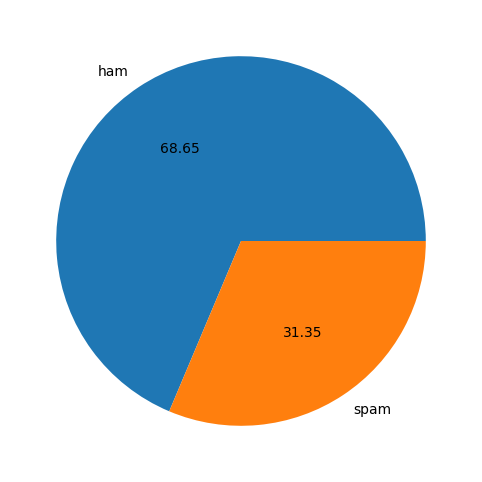

In [17]:
# Let's see the distribution of target variable
plt.figure(figsize=(12,6))
plt.pie(df['Label'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

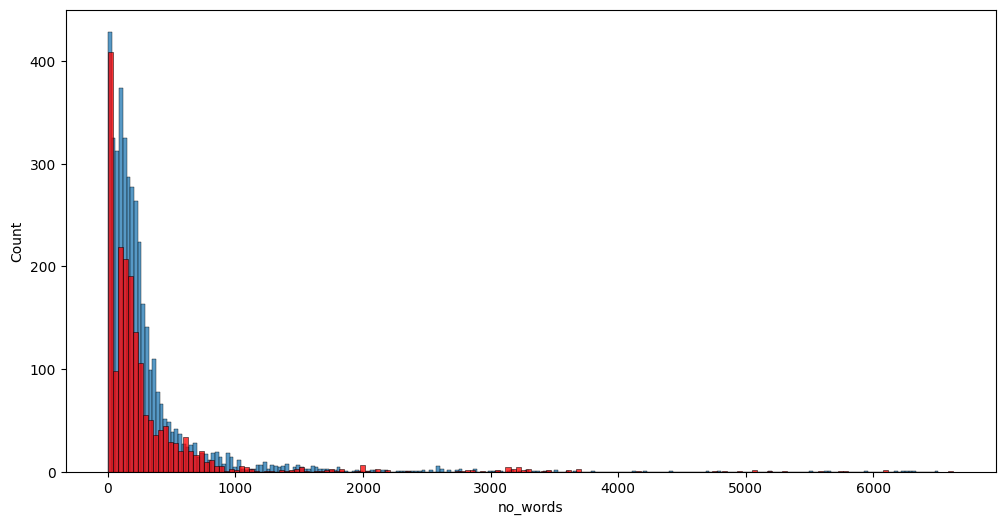

In [18]:
# Lets see the distribution of number of words in spam and ham emails
plt.figure(figsize=(12,6))
sns.histplot(df[df['Label'] == 0]['no_words'])
sns.histplot(df[df['Label'] == 1]['no_words'], color='red')
plt.show()

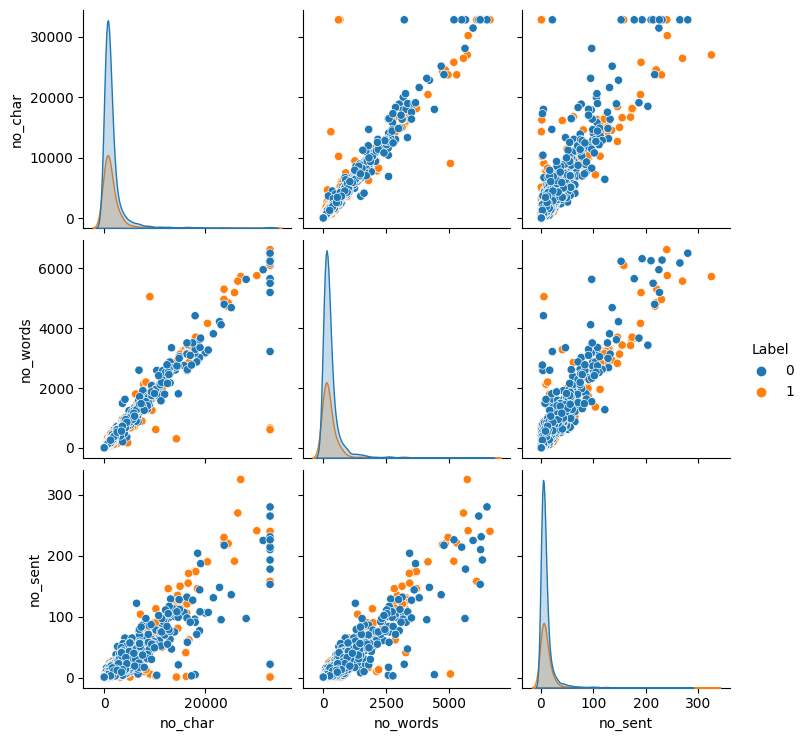

In [19]:
sns.pairplot(df, hue='Label')
plt.show()

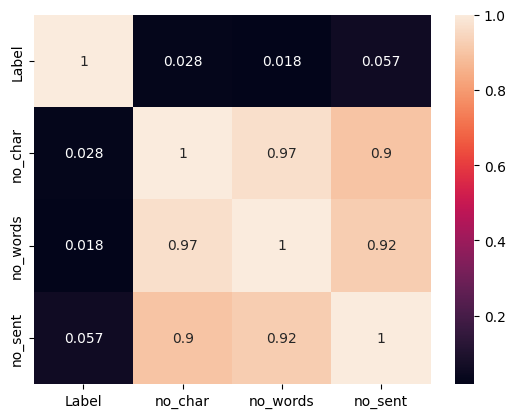

In [20]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> TEXT PREPROCESSING </p>

Whenever we have textual data, we need to apply several pre-processing steps to the data to transform words into numerical features that work with machine learning algorithms. The pre-processing steps for a problem depend mainly on the domain and the problem itself, hence, we don‚Äôt need to apply all steps to every problem.

**for this problem I created a function which performs following steps:**
* Text Lowercase
* Word Tokenize
* Remove Special Characters
* Remove Stopwords
* Remove Punctuation
* Stemming

In [21]:
def text_preprocessing(text):
    # convert  text to lowecase
    text = text.lower()

    # creating list of words in email
    text = nltk.word_tokenize(text)

    # removing special charecters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # copying processed text to text and clearing y to store next steps output
    text = y[:]
    y.clear()

    # removing stopwords and punctuation marks
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    # stemming
    stemmer = SnowballStemmer('english')
    for i in text:
        y.append(stemmer.stem(i))

    return " ".join(y)

In [22]:
# applying function to text
df['clean_text'] = df['Body'].apply(text_preprocessing)

In [23]:
df

Body  Label  no_char  \
0     \nSave up to 70% on Life Insurance.\nWhy Spend...      1     1111   
1     1) Fight The Risk of Cancer!\nhttp://www.adcli...      1      753   
2     1) Fight The Risk of Cancer!\nhttp://www.adcli...      1      610   
3     ##############################################...      1     2863   
4     I thought you might like these:\n1) Slim Down ...      1      641   
...                                                 ...    ...      ...   
6041                                              empty      0        5   
6042                    ___           ___           ...      0    16999   
6043  IN THIS ISSUE:01. Readers write\n02. Extension...      0     7299   
6044                                              empty      0        5   
6045                                              empty      0        5   

      no_words  no_sent                                         clean_text  
0          191       12  save 70 life insur spend life quot save ensur ...  
1          139        5  1 fight risk cancer http slim guarante lose lb...  
2          113        4  1 fight risk cancer http slim guarante lose lb...  
3          690       35  adult club offer free membership instant acces...  
4          108        4  thought might like 1 slim guarante lose lbs 30...  
...        ...      ...                                                ...  
6041         1        1                                              empti  
6042      3092       91  insignific matter heavili overemphasis hugh mt...  
6043      1478       83  reader write extens search dumb messag revisit...  
6044         1        1                                              empti  
6045         1        1                                              empti  

[6045 rows x 6 columns]

# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> EDA - II </p>

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

In [24]:
# setting specs of word cloud image
wc = WordCloud(width=1000, height=500, min_font_size=10, background_color='black')

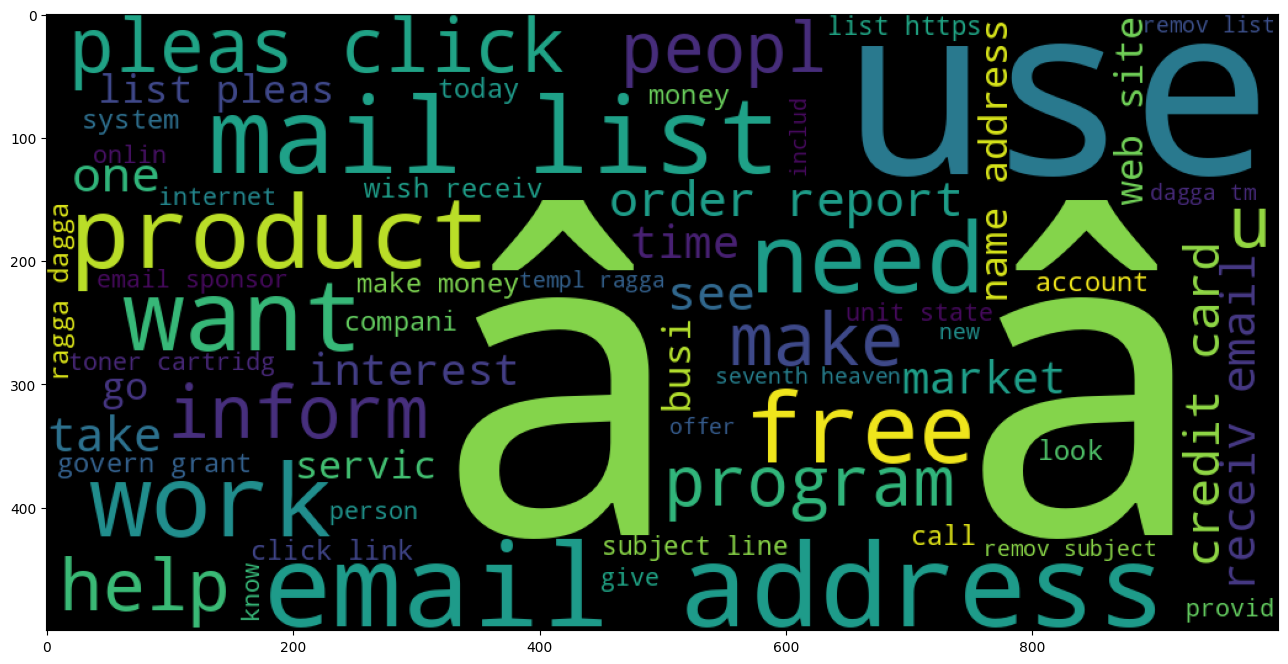

In [25]:
# creating word cloud of spam emails
spam_wc = wc.generate(df[df['Label'] == 1]['clean_text'].str.cat(sep=' '))

plt.figure(figsize=(20,8))
plt.imshow(spam_wc)

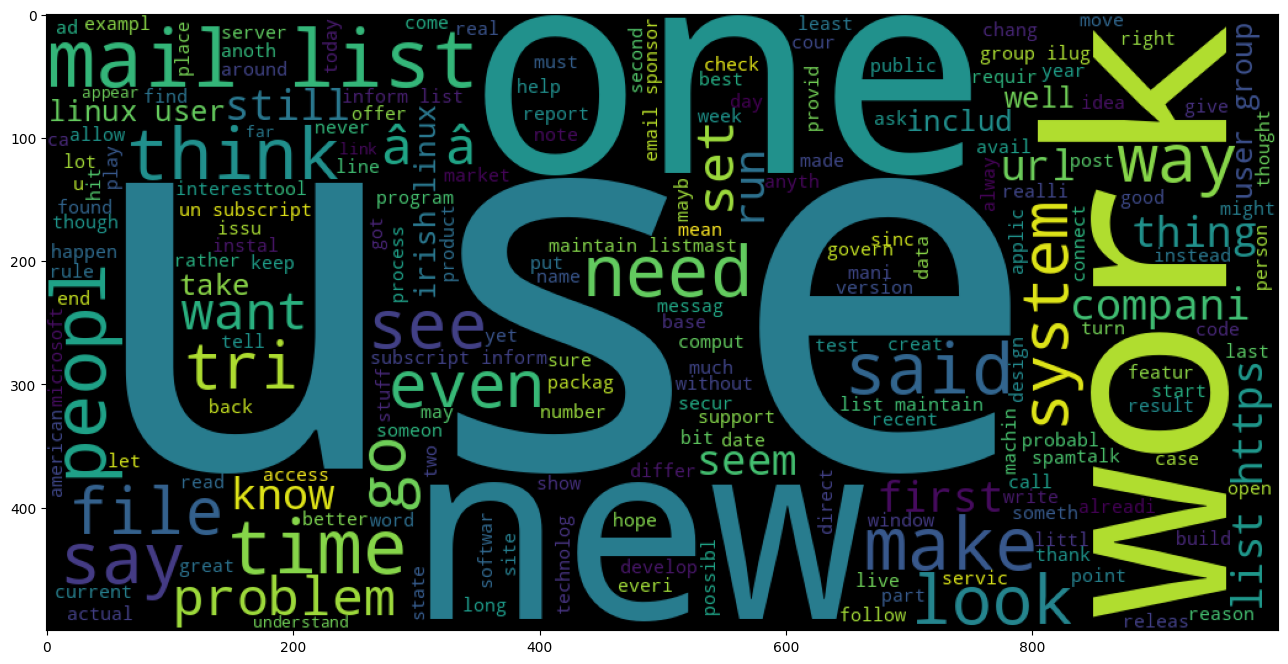

In [26]:
# creating word cloud of ham emails
ham_wc = wc.generate(df[df['Label'] == 0]['clean_text'].str.cat(sep=' '))

plt.figure(figsize=(20,8))
plt.imshow(ham_wc)

In [27]:
# creating list of all the words in processed spam emails
spam_corpus = []
for mail in df[df['Label'] == 1]['clean_text'].tolist():
    for word in mail.split():
        spam_corpus.append(word)

# number of words in all spam mails
len(spam_corpus)

267887

In [29]:
# creating list of all the words in processed ham emails
ham_corpus = []
for mail in df[df['Label'] == 0]['clean_text'].tolist():
    for word in mail.split():
        ham_corpus.append(word)

# number of words in all ham mails
len(ham_corpus)

519767

# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> TRAIN TEST SPLIT </p>

TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).  

Tf-idf is one of the best metrics to determine how significant a term is to a text in a series or a corpus. tf-idf is a weighting system that assigns a weight to each word in a document based on its term frequency (tf) and the reciprocal document frequency (tf) (idf). The words with higher scores of weight are deemed to be more significant.

In [31]:
#Changing text data in to numbers.

# tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=17000)

# Setting up features and target as x and y
x = tfidf.fit_transform(df['clean_text']).toarray()
y = df['Label'].values

In [32]:
# Splitting the testing and training sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# <p style="background-color:#562F5E;font-family:verdana;color:white;font-size:100%;text-align:center;letter-spacing:0.5px;padding: 10px"> MODEL SELECTION </p>

In [33]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=0)
abc = AdaBoostClassifier(n_estimators=50, random_state=0)
bc = BaggingClassifier(n_estimators=50, random_state=0)
etc = ExtraTreesClassifier(n_estimators=50, random_state=0)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=0)
xgb = XGBClassifier(n_estimators=50,random_state=0)
sgd = SGDClassifier(random_state=0)
cat = CatBoostClassifier(verbose=0, random_state=0)
lgbm = LGBMClassifier(random_state=0)

In [40]:
classifiers = {
    'GaussianNB' : gnb,
    'MultinomialNB' : mnb,
    'BernoulliNB' : bnb,
    'SVC' : svc,
    'KNeighbors' : knc,
    'DecisionTree': dtc,
    'LogisticRegression': lrc,
    'RandomForest': rfc,
    'AdaBoost': abc,
    'BaggingClassifier': bc,
    'ExtraTreesClassifier': etc,
    'GradientBoosting': gbdt,
    'XGB': xgb,
    'SGD' : sgd,
    'Catboost' : cat,
    'LGBM' : lgbm
}

In [35]:
# creating a function to train list of algorithms and give accuracy , precision score
def train_classifier(classifiers,x_train,y_train,x_test,y_test):

    classifiers.fit(x_train,y_train)

    y_pred = classifiers.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [36]:
# storing accuracy and precision in list
accuracy_scores = []
precision_scores = []

# training all the models on training data
for name, classifier in classifiers.items():

    current_accuracy,current_precision = train_classifier(classifiers, x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision,'\n')

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  GaussianNB
Accuracy -  0.9073614557485525
Precision -  0.8308080808080808 

For  MultinomialNB
Accuracy -  0.9371381306865177
Precision -  0.8983957219251337 

For  BernoulliNB
Accuracy -  0.9412737799834574
Precision -  0.9809523809523809 

For  SVC
Accuracy -  0.9586435070306039
Precision -  0.900990099009901 

For  KNeighbors
Accuracy -  0.39619520264681557
Precision -  0.338768115942029 

For  DecisionTree
Accuracy -  0.8875103391232424
Precision -  0.8005050505050505 

For  LogisticRegression
Accuracy -  0.9346567411083541
Precision -  0.8831168831168831 

For  RandomForest
Accuracy -  0.9371381306865177
Precision -  0.8725 

For  AdaBoost
Accuracy -  0.9263854425144747
Precision -  0.8467153284671532 

For  BaggingClassifier
Accuracy -  0.9313482216708023
Precision -  0.8574938574938575 

For  ExtraTreesClassifier
Accuracy -  0.946236559139785
Precision -  0.8911392405063291 

For  GradientBoosting
Accuracy -  0.9172870140612076
Precision -  0.8702702702702703 

For  XGB
Acc

Data Frame of accuracy and precision of models trained on all features

In [41]:
performance = pd.DataFrame({'Algorithm': classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance

Algorithm  Accuracy  Precision
2            BernoulliNB  0.941274   0.980952
13                   SGD  0.961125   0.903704
3                    SVC  0.958644   0.900990
1          MultinomialNB  0.937138   0.898396
14              Catboost  0.947891   0.893671
10  ExtraTreesClassifier  0.946237   0.891139
6     LogisticRegression  0.934657   0.883117
12                   XGB  0.942928   0.880299
15                  LGBM  0.946237   0.879607
7           RandomForest  0.937138   0.872500
11      GradientBoosting  0.917287   0.870270
9      BaggingClassifier  0.931348   0.857494
8               AdaBoost  0.926385   0.846715
0             GaussianNB  0.907361   0.830808
5           DecisionTree  0.887510   0.800505
4             KNeighbors  0.396195   0.338768

Data Frame of accuracy and precision of models trained on max_features = 17000

In [42]:
performance_maxf17k = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy_maxf17k':accuracy_scores,'Precision_maxf17k':precision_scores}).sort_values('Precision_maxf17k',ascending=False)
performance_maxf17k

Algorithm  Accuracy_maxf17k  Precision_maxf17k
2            BernoulliNB          0.941274           0.980952
13                   SGD          0.961125           0.903704
3                    SVC          0.958644           0.900990
1          MultinomialNB          0.937138           0.898396
14              Catboost          0.947891           0.893671
10  ExtraTreesClassifier          0.946237           0.891139
6     LogisticRegression          0.934657           0.883117
12                   XGB          0.942928           0.880299
15                  LGBM          0.946237           0.879607
7           RandomForest          0.937138           0.872500
11      GradientBoosting          0.917287           0.870270
9      BaggingClassifier          0.931348           0.857494
8               AdaBoost          0.926385           0.846715
0             GaussianNB          0.907361           0.830808
5           DecisionTree          0.887510           0.800505
4             KNeighbors          0.396195           0.338768

We can clearly see algorithm trained on 17000 features giving us the best result

**Best Performing Models:**
* BernoulliNB
* SGD
* SVC

# HYPERPARAMETER TUNING

*Les param√®tres qui d√©finissent l'architecture du mod√®le sont appel√©s hyperparam√®tres, et ainsi ce processus de recherche de l'architecture de mod√®le id√©ale est appel√© ajustement d'hyperparam√®tres.
*Les hyperparam√®tres ne sont pas des param√®tres du mod√®le et ils ne peuvent pas √™tre directement entra√Æn√©s √† partir des donn√©es. Les param√®tres du mod√®le sont appris lors de l'entra√Ænement lorsque nous optimisons une fonction de perte en utilisant quelque chose comme la descente de gradient.

*Les param√®tres du mod√®le sp√©cifient comment transformer les donn√©es d'entr√©e en la sortie souhait√©e, les hyperparam√®tres d√©finissent comment notre mod√®le est r√©ellement structur√©. Malheureusement, il n'y a pas de moyen de calculer "quelle direction devrais-je mettre √† jour mon hyperparam√®tre pour r√©duire la perte ?" (c'est-√†-dire les gradients) afin de trouver l'architecture de mod√®le optimale ; ainsi, nous avons g√©n√©ralement recours √† l'exp√©rimentation pour d√©couvrir ce qui fonctionne le mieux.

**Ajustement des hyperparam√®tres avec Optuna :
Optuna est "une biblioth√®que open-source d'optimisation d'hyperparam√®tres pour automatiser la recherche d'hyperparam√®tres optimaux". Les principales caract√©ristiques d'Optuna comprennent "la recherche automatis√©e d'hyperparam√®tres optimaux", "l'exploration efficace de grands espaces et l'√©lagage des essais peu prometteurs pour des r√©sultats plus rapides" et "la parall√©lisation des recherches d'hyperparam√®tres sur plusieurs threads ou processus".

**Tuning BernoulliNB**

The first step is to define the objective function for Optuna to maximize or minimize. The objective function should take a ‚ÄúTrial‚Äù object as the input and return the score, a float value or a list of float values.

In [43]:
def objective_bnb(trial):
        alpha = trial.suggest_categorical('alpha', [0.7,0.8,0.9,1,1.1,1.2,1.3])
        binarize = trial.suggest_categorical('binarize', [0.0,0.1,0.2,0.3])

        bnb = BernoulliNB(
                                        alpha=alpha,
                                        binarize=binarize
        )
        return cross_val_score(bnb, x_train, y_train, n_jobs=-1, verbose=0, scoring='precision').mean()

The next step is to use the objective function to create a ‚ÄúStudy‚Äù object and then optimize it.

In [44]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_bnb, n_trials=10)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2023-08-15 14:11:58,177] A new study created in memory with name: no-name-8336461f-e05e-4cc7-b3ce-01737bfb4bf0
[I 2023-08-15 14:12:10,759] Trial 0 finished with value: 0.9639960766496888 and parameters: {'alpha': 1.2, 'binarize': 0.1}. Best is trial 0 with value: 0.9639960766496888.
[I 2023-08-15 14:12:20,715] Trial 1 finished with value: 0.6 and parameters: {'alpha': 1.3, 'binarize': 0.3}. Best is trial 0 with value: 0.9639960766496888.
[I 2023-08-15 14:12:26,324] Trial 2 finished with value: 0.9784642131583059 and parameters: {'alpha': 1.1, 'binarize': 0.0}. Best is trial 2 with value: 0.9784642131583059.
[I 2023-08-15 14:12:32,170] Trial 3 finished with value: 1.0 and parameters: {'alpha': 1, 'binarize': 0.3}. Best is trial 3 with value: 1.0.
[I 2023-08-15 14:12:37,197] Trial 4 finished with value: 0.9795639423594343 and parameters: {'alpha': 1, 'binarize': 0.2}. Best is trial 3 with value: 1.0.
[I 2023-08-15 14:12:43,369] Trial 5 finished with value: 0.9477211242867056 and param

Accuracy: 1.0
Best hyperparameters: {'alpha': 1, 'binarize': 0.3}


In [45]:
bnb = BernoulliNB(alpha=0.9, binarize=0.3)
bnb.fit(x_train,y_train)

bnb_pred = bnb.predict(x_test)
print('Accuracy:',accuracy_score(y_test,bnb_pred))
print('Precision:',precision_score(y_test,bnb_pred))

Accuracy: 0.7262200165425972
Precision: 1.0


Nous avons r√©ussi √† augmenter la pr√©cision mais l'exactitude a diminu√©. J'ai beaucoup exp√©riment√© et j'ai constat√© qu'un des scores diminue si j'essaie d'augmenter les autres. Donc, je ne vais pas r√©gler ce mod√®le car il me donne de meilleurs r√©sultats de cette mani√®re.

**Tuning SGDClassifier:**

In [46]:
def objective_sgd(trial):
        loss = trial.suggest_categorical('loss', ['hinge','log_loss','log','modified_huber','squared_hinge','perceptron'])
        penalty = trial.suggest_categorical('penalty', ['l2','l1','elasticnet'])
        l1_ratio = trial.suggest_categorical('l1_ratio', [0.2,0.5,0.8])
        max_iter = trial.suggest_categorical('max_iter', [100,500,1000])


        sgd = SGDClassifier(
                            early_stopping=True,
                            random_state=0,
                            loss=loss,
                            penalty=penalty,
                            l1_ratio=l1_ratio,
                            max_iter=max_iter
        )
        return cross_val_score(sgd, x_train, y_train, n_jobs=-1, verbose=0, scoring='precision').mean()

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_sgd, n_trials=20)

trial_sgd = study.best_trial

print('Accuracy: {}'.format(trial_sgd.value))
print("Best hyperparameters: {}".format(trial_sgd.params))

[I 2023-08-15 14:15:04,964] A new study created in memory with name: no-name-e3d4a583-be8c-4bc3-a1f6-baaed3004e83
[I 2023-08-15 14:15:12,041] Trial 0 finished with value: 0.9339684439907998 and parameters: {'loss': 'squared_hinge', 'penalty': 'l2', 'l1_ratio': 0.5, 'max_iter': 500}. Best is trial 0 with value: 0.9339684439907998.
[I 2023-08-15 14:15:23,540] Trial 1 finished with value: 0.9252125720055387 and parameters: {'loss': 'perceptron', 'penalty': 'l2', 'l1_ratio': 0.2, 'max_iter': 100}. Best is trial 0 with value: 0.9339684439907998.
[I 2023-08-15 14:15:46,391] Trial 2 finished with value: 0.8834201881034248 and parameters: {'loss': 'modified_huber', 'penalty': 'elasticnet', 'l1_ratio': 0.2, 'max_iter': 1000}. Best is trial 0 with value: 0.9339684439907998.
[I 2023-08-15 14:16:08,564] Trial 3 finished with value: 0.885838312943928 and parameters: {'loss': 'squared_hinge', 'penalty': 'elasticnet', 'l1_ratio': 0.5, 'max_iter': 500}. Best is trial 0 with value: 0.9339684439907998.


In [ ]:
sgd = SGDClassifier(loss='perceptron',penalty='l2',l1_ratio=0.5,max_iter=1000)
sgd.fit(x_train,y_train)

sgd_pred = sgd.predict(x_test)
print('Accuracy:',accuracy_score(y_test,sgd_pred))
print('Precision:',precision_score(y_test,sgd_pred))

Accuracy: 0.946236559139785
Precision: 0.9904761904761905


we have increased the precision and accuracy is also looking good.

I am giving more importance to precision cause , precision means number of ham emails classified as spam and accuracy means number of correctly classified emails.  

I am okay with few spam emails not classified as spam, but i don't want any ham email classified as spam cuase it might be very important. So thats why i wanted precision very high as well as accuracy

<h2 style="background-color:#562F5E;font-family:verdana;color:white;font-size:200%;text-align:center;letter-spacing:0.5px;padding: 10px"> If You Liked The NoteBook, Please Upvote‚úå  </h2>